# 1] 데이터 전체 EDA 및 전반적인 분포 점검


In [25]:
# 0. 데이터 및 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/Users/Star1/Desktop/2025/2025여름/수도권_해커톤/좌표변환/PURPOSE_250M_202403_with_lonlat.csv")



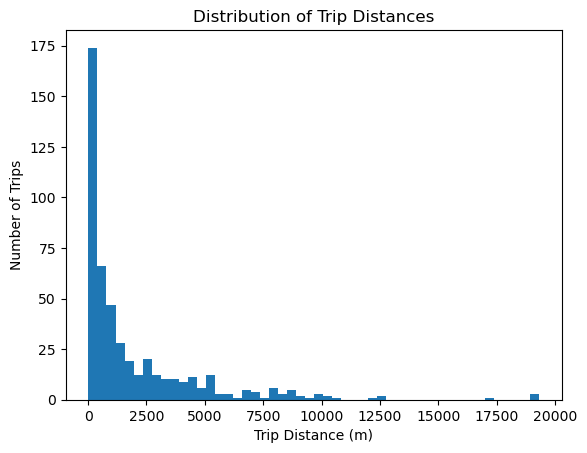

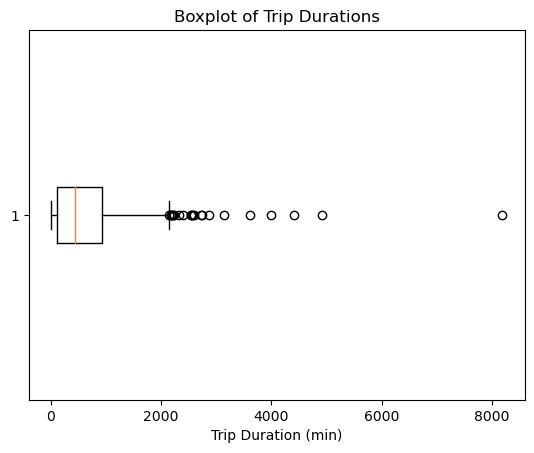

In [ ]:

# ---------------------------------------------------------------------------- #
# 1. Distribution of Trip Distances
#    컬럼: MOVE_DIST (평균 이동 거리(m))
plt.figure()
plt.hist(df['MOVE_DIST'].dropna(), bins=50)
plt.xlabel("Trip Distance (m)")   # x-axis: Trip Distance (평균 이동 거리)
plt.ylabel("Number of Trips")     # y-axis: Number of Trips (여행 횟수)
plt.title("Distribution of Trip Distances")  # Title: Distribution of Trip Distances (이동 거리 분포)
plt.show()


# ->>>인사이트: 단거리가 많다. 한 3~400m 미만 이동 많고, 1km 미만에 대부분 몰려있음
# ---------------------------------------------------------------------------- #
# 2. Boxplot of Trip Durations
#    컬럼: MOVE_TIME (평균 이동 시간(분))
plt.figure()
plt.boxplot(df['MOVE_TIME'].dropna(), vert=False)
plt.xlabel("Trip Duration (min)") # x-axis: Trip Duration (평균 이동 시간)
plt.title("Boxplot of Trip Durations")  # Title: Boxplot of Trip Durations (이동 시간 상자도표)
plt.show()

# ->>>인사이트: 이동시간도 1000분 미만으로 몰려있음

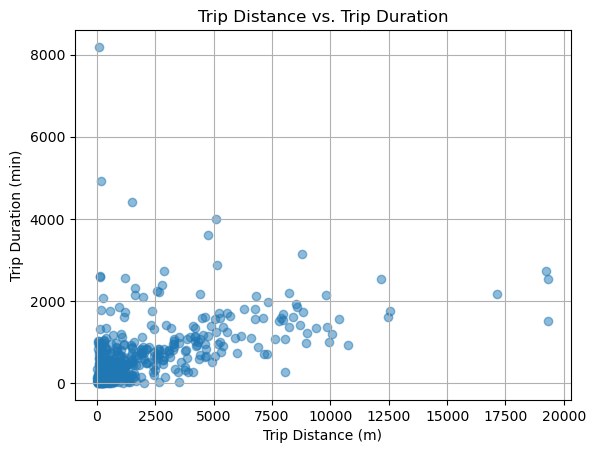

In [12]:
# ---------------------------------------------------------------------------- #
# 3. Scatter: Distance vs Duration
#    컬럼: MOVE_DIST (평균 이동 거리(m)), MOVE_TIME (평균 이동 시간(분))
plt.figure()
plt.scatter(df['MOVE_DIST'], df['MOVE_TIME'], alpha=0.5)
plt.xlabel("Trip Distance (m)")       # MOVE_DIST (평균 이동 거리)
plt.ylabel("Trip Duration (min)")     # MOVE_TIME (평균 이동 시간)
plt.title("Trip Distance vs. Trip Duration")   # 이동 거리 대 이동 시간 산점도
plt.grid(True)
plt.show()

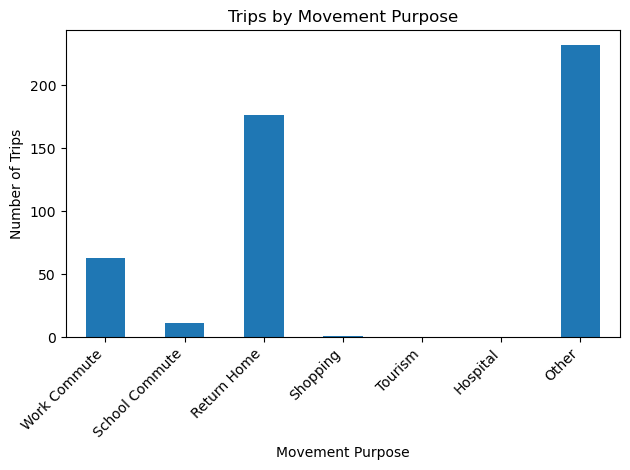

MOVE_PURPOSE
Work Commute       63
School Commute     11
Return Home       176
Shopping            1
Tourism             0
Hospital            0
Other             232
Name: count, dtype: int64

In [ ]:
# ---------------------------------------------------------------------------- #
# 4. Bar chart: Trips by Movement Purpose
#    컬럼: MOVE_PURPOSE (이동 목적: 1=Commute to Work, 2=Commute to School, 3=Return Home,
#                       4=Shopping, 5=Tourism, 6=Hospital, 7=Other)
purpose_map = {
    1: "Work Commute",
    2: "School Commute",
    3: "Return Home",
    4: "Shopping",
    5: "Tourism",
    6: "Hospital",
    7: "Other"
}
counts = (
    df['MOVE_PURPOSE']
        .map(purpose_map)
        .value_counts()
        .reindex(list(purpose_map.values()), fill_value=0) #이 작업 안하면 여행이랑 병원이 0이 나와버리니까 에러걸림
    )
    
plt.figure()
counts.plot(kind='bar')
plt.xlabel("Movement Purpose")   # MOVE_PURPOSE (이동 목적)
plt.ylabel("Number of Trips")    # 여행 횟수
plt.title("Trips by Movement Purpose")  # 이동 목적별 여행 횟수
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

counts

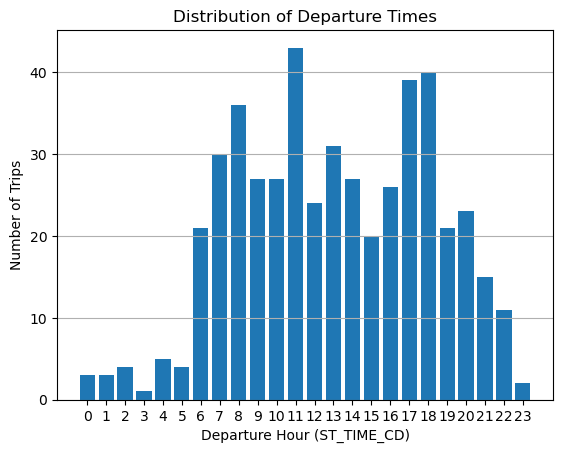

In [17]:
# ---------------------------------------------------------------------------- #
# 5. Histogram: Departure Time Distribution
#    컬럼: ST_TIME_CD (출발 시간, 정수 0–23)
plt.figure()
plt.hist(df['ST_TIME_CD'].dropna(), bins=range(0,25), align='left', rwidth=0.8)
plt.xlabel("Departure Hour (ST_TIME_CD)")  # 출발 시간
plt.ylabel("Number of Trips")             # 여행 횟수
plt.title("Distribution of Departure Times")  # 출발 시간 분포
plt.xticks(range(0,24))
plt.grid(axis='y')
plt.show()


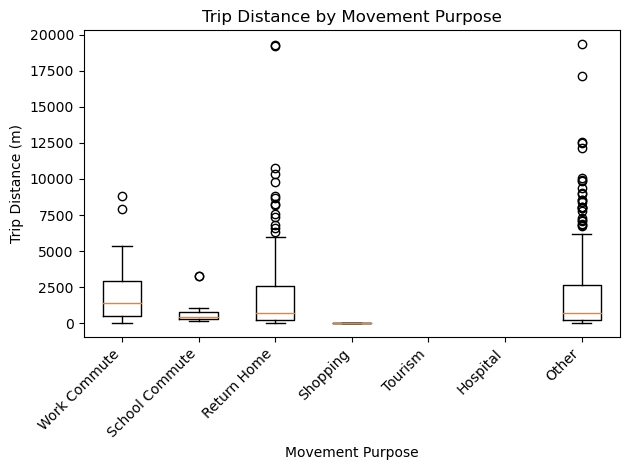

In [18]:
# ---------------------------------------------------------------------------- #
# 6. Boxplot: Distance by Purpose
#    컬럼: MOVE_DIST (평균 이동 거리), MOVE_PURPOSE (이동 목적)
plt.figure()
# 재구성: distance 리스트를 목적별로 분리
groups = [df.loc[df['MOVE_PURPOSE']==code, 'MOVE_DIST'].dropna()
          for code in sorted(purpose_map)]
plt.boxplot(groups, labels=[purpose_map[c] for c in sorted(purpose_map)])
plt.xlabel("Movement Purpose")        # MOVE_PURPOSE (이동 목적)
plt.ylabel("Trip Distance (m)")        # MOVE_DIST (평균 이동 거리)
plt.title("Trip Distance by Movement Purpose")  # 이동 목적별 이동 거리 상자도표
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2] 핫플레이스 분석

### 1. 단순 도착지 카운트 많은 것들 나열 및 시각화


In [ ]:
import folium


# 1) 상위 12개 도착지 추출
    # 12개 좌표는 2개까지 카운트지만 나머지 위치들은 전부 1개만 찍힘. 그래서 상위 12개
dest_counts = df.groupby(['lon_d','lat_d']).size()
top12 = dest_counts.sort_values(ascending=False).head(12)  # 상위 12개


# 2) 지도 생성 (중심은 전체 도착지 평균 좌표)
m = folium.Map(
    location=[df['lat_d'].mean(), df['lon_d'].mean()],
    zoom_start=11
)

# 3) 상위 12개에 CircleMarker 추가
for (lon, lat), cnt in top12.items():
    folium.CircleMarker(
        location=[lat, lon],
        radius=5 + (cnt/ top12.max())*10,   # 방문량에 따라 반경 조절 (5~15)
        color='red',
        fill=True,
        fill_opacity=0.7,
        popup=f"Count: {cnt}"              # 클릭하면 횟수 표시
    ).add_to(m)

# 4) 결과 저장 및 표시
m.save("top12_destinations_map.html")

top12

# =>결론: 데이터가 너무 적어서 잘 모르겠음. 최소 1년치 데이터로 해야할듯


lon_d       lat_d    
126.732258  37.484874    2
126.968307  37.294631    2
127.006006  37.567458    2
126.666749  37.527244    2
126.709733  37.475712    2
126.899123  37.481334    2
126.920663  37.621150    2
126.941503  37.486049    2
126.969142  37.576311    2
126.730986  37.608800    2
127.036277  37.249847    2
127.028908  37.526991    2
dtype: int64

### 2. 시각화 기반 탐색 (Heatmap & Clustering)



In [32]:
import folium
from folium.plugins import HeatMap
from sklearn.cluster import DBSCAN
import numpy as np


In [33]:
# 1) 기본 지도 객체 생성: 지도 중심을 데이터의 평균 도착 위경도로 잡고, 초기 확대 수준 지정
m = folium.Map(
    location=[df['lat_d'].mean(), df['lon_d'].mean()],
    zoom_start=11
)

# 2) HeatMap용 데이터 리스트 준비
heat_data = df[['lat_d','lon_d']].dropna().values.tolist()

# 3) HeatMap 레이어 추가: 도착지(lat_d, lon_d) 좌표를 2차원 리스트로 변환
HeatMap(
    heat_data,
    radius=8,    # 점 하나당 반경(pixel)
    blur=15      # 퍼짐 정도
).add_to(m)

# 4) DBSCAN 클러스터링
#     위치 좌표를 라디안으로 변환
#   eps: 반경(km)을 지구 반지름(6371km)으로 나눠서 설정
#   min_samples: 군집 최소 샘플 수

coords = np.radians(df[['lat_d','lon_d']])
db = DBSCAN(
    eps=1.5/6371.0088,  # 1.5km 반경
    min_samples=20,
    metric='haversine'
).fit(coords)
df['cluster'] = db.labels_

# 5) 클러스터별로 색 다른 CircleMarker 추가
colors = ['red','blue','green','purple','orange','darkred']
for _, row in df.dropna(subset=['cluster']).iterrows():
    folium.CircleMarker(
        location=[row['lat_d'], row['lon_d']],
        radius=3,
        color=colors[row['cluster'] % len(colors)],
        fill=True, fill_opacity=0.6
    ).add_to(m) #지도에 누적시키는 것. 이거 m이 처음 1)에서 만든거 ㅇㅇ
    

# 6) 결과 저장
m.save("destination_heat_cluster_map.html")




In [ ]:
# 아래는 컨벡스헐까지 추가로 입히기

In [ ]:
import folium
from folium.plugins import HeatMap
from shapely.geometry import MultiPoint, mapping
import numpy as np


# 0) 필요한 데이터 준비 (이미 df에 cluster 라벨이 있다고 가정)
heat_data = df[['lat_d','lon_d']].dropna().values.tolist()
point_data = heat_data  # 빨간 점 찍을 좌표 리스트

# 1) 지도 객체
m = folium.Map(
    location=[df['lat_d'].mean(), df['lon_d'].mean()],
    zoom_start=11
)

# 2) HeatMap 레이어
    # 히트맵: 각 점을 “가우시안 커널”로 부드럽게 퍼뜨린 뒤 합쳐서, 
        # 밀도가 높은 곳은 붉게(Hot)·낮은 곳은 투명하게(Cold) 보여 주는 연속적(density) 시각화.
        # =그냥 모델이 알아서 각 점들의 모여있는 부분에서, '진짜' 핵심인 부분을 더 부각시켜준다는 뜻
heat_fg = folium.FeatureGroup(name='HeatMap')
HeatMap(
    heat_data,
    radius=8,
    blur=15,
).add_to(heat_fg)
heat_fg.add_to(m)

# 3) 원래 빨간 점 레이어
points_fg = folium.FeatureGroup(name='Destination Points')
for lat, lon in point_data:
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color='red',
        fill=True, fill_opacity=0.8
    ).add_to(points_fg)
points_fg.add_to(m)

# 4) 컨벡스 헐 레이어
    # 클러스터링을 해주는건데, 각 클러스터별 외곽 구분을 더 확실하게 해줌
hull_fg = folium.FeatureGroup(name='Cluster Hulls')
colors = ['red','blue','green','purple','orange','darkred']
for cluster_id in sorted(df['cluster'].unique()):
    if cluster_id < 0: 
        continue
    pts = df.loc[df.cluster==cluster_id, ['lon_d','lat_d']].values
    if len(pts) < 3:
        continue
    hull = MultiPoint(pts).convex_hull
    folium.GeoJson(
        mapping(hull),
        style_function=lambda feat, cid=cluster_id: {
            'fillColor': colors[cid % len(colors)],
            'color': colors[cid % len(colors)],
            'weight': 2,
            'fillOpacity': 0.1,
        }
    ).add_to(hull_fg)
hull_fg.add_to(m)

# 5) (옵션) 레이어 컨트롤러 추가
folium.LayerControl().add_to(m)

# 6) 저장
m.save("dest_heat_points_hulls.html")


### 3 목적별 & 인구특성별 분류

In [ ]:
# 3-1. 이동목적별 집중 지역 

# 예: 출발지는 무시하고 도착지만으로 목적별 count 집계
df_purp = df.groupby(['MOVE_PURPOSE','lat_d','lon_d']).size().reset_index(name='cnt')

# 어차피 데이터가 적어서 그냥 전체 행 돌림
top30_by_purp = (
    df_purp
    .groupby('MOVE_PURPOSE')
    .apply(lambda g: g.nlargest(500, 'cnt'))
    .reset_index(drop=True)
)

import folium
from folium.plugins import HeatMap

m = folium.Map(location=[df['lat_d'].mean(), df['lon_d'].mean()], zoom_start=11)
colors = {1:'red',2:'blue',3:'green',4:'orange',5:'purple',6:'darkred',7:'cadetblue'}

for purp, grp in top30_by_purp.groupby('MOVE_PURPOSE'):
    fg = folium.FeatureGroup(name=f'Purpose {purp}')
    # ● 히트맵 (상위 30개만)
    HeatMap(grp[['lat_d','lon_d','cnt']].values.tolist(),
            radius=15, blur=10).add_to(fg)
    # ● 점 마커
    for _, r in grp.iterrows():
        folium.CircleMarker(
            location=[r.lat_d, r.lon_d],
            radius=4, color=colors[purp],
            fill=True, fill_opacity=0.7
        ).add_to(fg)
    fg.add_to(m)

folium.LayerControl().add_to(m)
m.save("purpose_hotspots.html")




/var/folders/34/nfsz0w6s5rl3lqtq7z6j5p_h0000gp/T/ipykernel_88640/1698705285.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.nlargest(500, 'cnt'))


In [54]:
# 3-2. 연령·성별 프로파일링

# 1) 특성 선택 & 정규화:

# 예: 20대 남녀, 25대 남녀, 30대 남녀 … 쭉 가져오기
age_cols = [c for c in df.columns if c.startswith(('MALE_','FEML_'))]
df_demo = (
    df
    .groupby(['lat_d','lon_d'], as_index=False)[age_cols]
    .sum()
    
)
df_demo[age_cols] = df_demo[age_cols].div(df_demo[age_cols].sum(axis=1), axis=0)

# 2) 차원 축소 또는 군집화:

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X = df_demo[age_cols].values
# PCA로 2차원 축소
pc = PCA(n_components=2).fit_transform(X)
df_demo['pc1'], df_demo['pc2'] = pc[:,0], pc[:,1]
# KMeans로 프로파일 군집화 (예: k=4)
df_demo['demo_cluster'] = KMeans(n_clusters=4).fit_predict(X)

# 3) 산점도 & 지도 시각화:
# 1) PC 산점도로 프로파일 분포 보기
import matplotlib.pyplot as plt
plt.scatter(df_demo['pc1'], df_demo['pc2'],
            c=df_demo['demo_cluster'], alpha=0.6)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('Age/Gender Profile Clusters')
plt.show()

# 2) 지도에 각 프로파일을 색깔별 점으로 표시
m2 = folium.Map(location=[df['lat_d'].mean(), df['lon_d'].mean()], zoom_start=11)
palette = ['red','blue','green','purple']
for _, r in df_demo.iterrows():
    folium.CircleMarker(
        location=[r.lat_d, r.lon_d],
        radius=3,
        color=palette[r.demo_cluster],
        fill=True, fill_opacity=0.7
    ).add_to(m2)
folium.LayerControl().add_to(m2)
m2.save("age_gender_profiles.html")



ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [44]:
# age_cols 는 앞에서 정의한 연령·성별 컬럼 리스트
age_cols = [c for c in df.columns if c.startswith(('MALE_','FEML_'))]

# (1) 전체 결측치 개수 확인
# print(df_demo[age_cols].isnull().sum())

# (2) 결측치가 한 줄이라도 섞여 있는 행 보기
nan_rows = df_demo[df_demo[age_cols].isnull().any(axis=1)]
print(nan_rows[['lat_d','lon_d'] + age_cols].head())
print("총 결측 행 수:", len(nan_rows))


         lat_d       lon_d  MALE_00_CNT  MALE_10_CNT  MALE_20_CNT  \
35   37.220318  126.980100          NaN          NaN          NaN   
59   37.270533  127.154579          NaN          NaN          NaN   
66   37.276629  126.974073          NaN          NaN          NaN   
76   37.284548  127.453465          NaN          NaN          NaN   
101  37.322184  127.097909          NaN          NaN          NaN   

     MALE_30_CNT  MALE_35_CNT  MALE_40_CNT  MALE_45_CNT  MALE_50_CNT  ...  \
35           NaN          NaN          NaN          NaN          NaN  ...   
59           NaN          NaN          NaN          NaN          NaN  ...   
66           NaN          NaN          NaN          NaN          NaN  ...   
76           NaN          NaN          NaN          NaN          NaN  ...   
101          NaN          NaN          NaN          NaN          NaN  ...   

     FEML_40_CNT  FEML_45_CNT  FEML_50_CNT  FEML_55_CNT  FEML_60_CNT  \
35           NaN          NaN          NaN        

In [47]:
age_cols = [c for c in df.columns if c.startswith(('MALE_','FEML_'))]
print(df[age_cols].dtypes)
print(df_demo[age_cols].isnull().sum())



MALE_00_CNT    float64
MALE_10_CNT    float64
MALE_20_CNT    float64
MALE_30_CNT    float64
MALE_35_CNT    float64
MALE_40_CNT    float64
MALE_45_CNT    float64
MALE_50_CNT    float64
MALE_55_CNT    float64
MALE_60_CNT    float64
MALE_65_CNT    float64
MALE_70_CNT    float64
MALE_75_CNT    float64
MALE_80_CNT    float64
MALE_85_CNT    float64
FEML_00_CNT    float64
FEML_10_CNT    float64
FEML_15_CNT    float64
FEML_20_CNT    float64
FEML_25_CNT    float64
FEML_30_CNT    float64
FEML_35_CNT    float64
FEML_40_CNT    float64
FEML_45_CNT    float64
FEML_50_CNT    float64
FEML_55_CNT    float64
FEML_60_CNT    float64
FEML_65_CNT    float64
FEML_70_CNT    float64
FEML_75_CNT    float64
FEML_80_CNT    float64
FEML_85_CNT    float64
dtype: object
MALE_00_CNT    29
MALE_10_CNT    29
MALE_20_CNT    29
MALE_30_CNT    29
MALE_35_CNT    29
MALE_40_CNT    29
MALE_45_CNT    29
MALE_50_CNT    29
MALE_55_CNT    29
MALE_60_CNT    29
MALE_65_CNT    29
MALE_70_CNT    29
MALE_75_CNT    29
MALE_80_CNT    2

In [48]:
# 1-1) 전체 열 정보 출력
print(df.info())

# 1-2) 샘플 몇 개만 보기
print(df[age_cols].head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ETL_YMD         483 non-null    int64  
 1   O_CELL_ID       483 non-null    object 
 2   O_CELL_TP       483 non-null    int64  
 3   D_CELL_ID       483 non-null    object 
 4   D_CELL_TP       483 non-null    int64  
 5   ST_TIME_CD      483 non-null    int64  
 6   FNS_TIME_CD     483 non-null    int64  
 7   IN_FORN_DIV_NM  483 non-null    int64  
 8   MOVE_PURPOSE    483 non-null    int64  
 9   MOVE_DIST       483 non-null    int64  
 10  MOVE_TIME       483 non-null    int64  
 11  MALE_00_CNT     483 non-null    float64
 12  MALE_10_CNT     483 non-null    float64
 13  MALE_20_CNT     483 non-null    float64
 14  MALE_30_CNT     483 non-null    float64
 15  MALE_35_CNT     483 non-null    float64
 16  MALE_40_CNT     483 non-null    float64
 17  MALE_45_CNT     483 non-null    flo

In [49]:
# 1) 집계할 연령·성별 컬럼 리스트
age_cols = [c for c in df.columns if c.startswith(('MALE_','FEML_'))]

# 2) 도착지(lat_d, lon_d) 기준으로 합계(sum) 집계
df_demo = (
    df
    .groupby(['lat_d','lon_d'], as_index=False)[age_cols]
    .sum()
)

# 3) 집계 결과 확인
print(df_demo.info())
print(df_demo[age_cols].isnull().sum())  # 모두 0이어야 함
print(df_demo.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lat_d        471 non-null    float64
 1   lon_d        471 non-null    float64
 2   MALE_00_CNT  471 non-null    float64
 3   MALE_10_CNT  471 non-null    float64
 4   MALE_20_CNT  471 non-null    float64
 5   MALE_30_CNT  471 non-null    float64
 6   MALE_35_CNT  471 non-null    float64
 7   MALE_40_CNT  471 non-null    float64
 8   MALE_45_CNT  471 non-null    float64
 9   MALE_50_CNT  471 non-null    float64
 10  MALE_55_CNT  471 non-null    float64
 11  MALE_60_CNT  471 non-null    float64
 12  MALE_65_CNT  471 non-null    float64
 13  MALE_70_CNT  471 non-null    float64
 14  MALE_75_CNT  471 non-null    float64
 15  MALE_80_CNT  471 non-null    float64
 16  MALE_85_CNT  471 non-null    float64
 17  FEML_00_CNT  471 non-null    float64
 18  FEML_10_CNT  471 non-null    float64
 19  FEML_15_

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1) 데이터 불러오기
#    PURPOSE_250M_202403_with_lonlat.csv 에는 원본 인구 카운트 + 변환된 위경도(lat_d, lon_d)가 모두 포함되어 있어야 합니다.
df = pd.read_csv("PURPOSE_250M_202403_with_lonlat.csv", encoding="cp949")

# 2) 연령·성별 카운트 컬럼 리스트 정의
age_cols = [c for c in df.columns if c.startswith("MALE_") or c.startswith("FEML_")]

# 3) 도착지(lat_d, lon_d) 기준으로 인구 수 합계 집계
#    같은 좌표(셀)에 속한 모든 인구 카운트를 더해서 셀 단위 프로파일을 만듭니다.
df_demo = (
    df
    .groupby(["lat_d", "lon_d"], as_index=False)[age_cols]
    .sum()
)

# 4) PCA(주성분 분석) → 2차원으로 축소
X = df_demo[age_cols].values  # numpy array 형태로 변환
pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(X)
df_demo["PC1"] = pcs[:, 0]
df_demo["PC2"] = pcs[:, 1]

# 5) K-Means 클러스터링 → 4개 군집 예시
kmeans = KMeans(n_clusters=4, random_state=0)
df_demo["Cluster"] = kmeans.fit_predict(X)

# 6) 결과 시각화: PCA 축 위에 군집별로 색상 구분된 산점도
plt.figure(figsize=(8, 6))
for cl in sorted(df_demo["Cluster"].unique()):
    subset = df_demo[df_demo["Cluster"] == cl]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        label=f"Cluster {cl}",
        alpha=0.6,
        edgecolor="k",
        s=50
    )

plt.xlabel("Principal Component 1")    # 주성분 1
plt.ylabel("Principal Component 2")    # 주성분 2
plt.title("Age–Gender Profile Clusters (Destination Cells)")  # 연령·성별 프로파일 군집
plt.legend(title="Cluster ID")         # 군집 레이블
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/Star1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [55]:
# 3-3. 내국인 vs 외국인 분
df_nat = df[df.IN_FORN_DIV_NM=='내국인'].groupby(['lat_d','lon_d']).size().rename('nat').reset_index()
df_for = df[df.IN_FORN_DIV_NM=='외국인'].groupby(['lat_d','lon_d']).size().rename('for').reset_index()
df_mix = df_nat.merge(df_for, on=['lat_d','lon_d'], how='outer').fillna(0)
df_mix['ratio_foreign'] = df_mix['for'] / (df_mix['nat'] + df_mix['for'])

m3 = folium.Map(location=[df['lat_d'].mean(), df['lon_d'].mean()], zoom_start=11)
for _, r in df_mix.iterrows():
    folium.CircleMarker(
        location=[r.lat_d, r.lon_d],
        radius=4,
        color=None,
        fill=True,
        fill_color=plt.cm.Reds(r.ratio_foreign),
        fill_opacity=0.8
    ).add_to(m3)
m3.save("domestic_vs_foreign.html")




In [ ]:
import pandas as pd
import folium
from branca.colormap import linear

# ratio_foreign 이 0에 가까울수록 외국인 비율이 0, 즉 내국인만 있다
    # 시뻘건 곳들만 외국인 있는 곳

# 1) 숫자 코드로 내·외국인 집계 (1=내국인, 2=외국인)
df_nat = (
    df[df.IN_FORN_DIV_NM == 1]
    .groupby(["lat_d", "lon_d"])
    .size()
    .rename("nat")
    .reset_index()
)
df_for = (
    df[df.IN_FORN_DIV_NM == 2]
    .groupby(["lat_d", "lon_d"])
    .size()
    .rename("for")
    .reset_index()
)

# 2) 합친 뒤 외국인 비율 계산
df_mix = (
    df_nat
    .merge(df_for, on=["lat_d", "lon_d"], how="outer")
    .fillna(0)
)
df_mix["ratio_foreign"] = df_mix["for"] / (df_mix["nat"] + df_mix["for"])

# 3) 빨강 계열 컬러맵 생성 (0~1 구간)
colormap = linear.Reds_09.scale(0, 1)  
colormap.caption = "Foreign Ratio"  # 범례 제목

# 4) 지도 객체 생성
m3 = folium.Map(
    location=[df["lat_d"].mean(), df["lon_d"].mean()],
    zoom_start=11
)

# 5) CircleMarker 추가
for _, r in df_mix.iterrows():
    folium.CircleMarker(
        location=[r.lat_d, r.lon_d],
        radius=5,
        fill=True,
        fill_color=colormap(r.ratio_foreign),
        color=None,
        fill_opacity=0.8
    ).add_to(m3)

# 6) 범례(컬러바) 추가
m3.add_child(colormap)

# 7) 결과 저장
m3.save("domestic_vs_foreign_reds.html")
